In [4]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv("Investmentguru.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/Investmentguru.csv'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Annual Income  101 non-null    int64
dtypes: int64(1)
memory usage: 936.0 bytes


In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df)

In [8]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

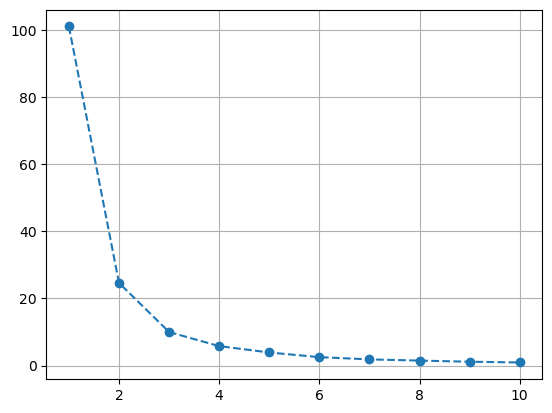

In [9]:
plt.plot(range(1,11), wcss, "o--")
plt.grid()
plt.show()

In [12]:
kmeans = KMeans(n_clusters=3, random_state=1)
ylabel = kmeans.fit_predict(x)

In [13]:
df["Class"]=ylabel

In [17]:
df.tail(30)

,Annual Income,Class
71,4150500,1
72,4200500,1
73,4250500,1
74,4300500,1
75,4350500,1
76,4400500,1
77,4450500,1
78,4500500,1
79,4550500,1
80,4600500,1


In [18]:
kmeans.cluster_centers_

array([[-1.1658663 ],
       [ 1.16475441],
       [ 0.03536938]])

In [16]:
df.to_csv("Investment_Class.csv")

In [26]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=0)

In [33]:
def mymod(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    train=model.score(xtrain,ytrain)
    test=model.score(xtest,ytest)
    print(f"Training Accuracy:{train}\nTesting Accuracy:{test}\n\n")
    print(classification_report(ytest,ypred))
    return model

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [35]:
DT=mymod(DecisionTreeClassifier())

Training Accuracy:1.0
Testing Accuracy:1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [55]:
def Investment_plans():
    list0=["Tata AIA Fortune Pro","LIC SIIP","PNB Metlife Mera Wealth Plan"]
    list1=["HDFC Standard Sampoorn Nivesh (11X)","ICICI Prudential Signature","SBI eWealth Insurance"]
    list2=["Max Life Online Savings Plan","Bajaj Allianz Smart Wealth Goal","Birla Sun Life Wealth Aspire Plan"]
    name=input("Your Name:")
    inc=float(input("Give your annual income:"))
    pred=DT.predict([[inc]])
    if pred==0:
        for i in list0:
            print("Please invest on",i)
    elif pred==1:
        for i in list1:
            print("Please invest on",i)
    elif pred==2:
        for i in list2:
            print("Please invest on",i)
    else:
        print("Stock Marketing")

In [57]:
Investment_plans()

Name:Rahini
Give your annual income:1250000
Please invest on Tata AIA Fortune Pro
Please invest on LIC SIIP
Please invest on PNB Metlife Mera Wealth Plan
